In [55]:
#!/usr/bin/env python3
import os
import requests
from datetime import datetime
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

OWNER = "WATonomous"
REPO = "infra-config"

# For easier reading, we put the run IDs in lists by category.
BEFORE_USER_INGESTION = [
    "12427574689",
    "12427547885",
    "12424954086",
    "12424337584",
    "12422341445",
    "12420112260",
]

BEFORE_MASTER_SCHEDULED = [
    "12553360748",
    "12530736888",
    "12521935862",
    "12509665511",
    "12487314642",
    "12449453195",
    "12440178947",
    "12422821414",
]

AFTER_USER_INGESTION = [
    "12854845210",
    "12851571085",
    "12850108807",
    "12696207371",
    "12682617238",
]

AFTER_MASTER_SCHEDULED = [
    "12848528449",
    "12838792205",
    "12819860145",
    "12799262666",
    "12778673306",
    "12738272633",
    "12738272633",
]

def print_run_times(run_id: str, github_token: str):
    """
    Fetch and display the creation time, updated (completion) time, 
    and duration (in seconds) for the given workflow run ID.
    """
    url = f"https://api.github.com/repos/{OWNER}/{REPO}/actions/runs/{run_id}"
    headers = {
        "Accept": "application/vnd.github+json",
        "Authorization": f"Bearer {github_token}",
    }
    
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print(f"ERROR: Failed to fetch run {run_id} (HTTP {response.status_code}).")
        return

    data = response.json()
    
    created_at_str = data.get("created_at")
    updated_at_str = data.get("updated_at")
    
    # Convert the timestamps to datetime objects
    # The timestamps are in ISO 8601 format like "2021-03-04T09:39:19Z"
    start_time = datetime.fromisoformat(created_at_str.replace("Z", "+00:00"))
    end_time   = datetime.fromisoformat(updated_at_str.replace("Z", "+00:00"))
    
    # Calculate duration in seconds
    duration_seconds = (end_time - start_time).total_seconds()
    if duration_seconds < 0:
        # If the run hasn't completed or there's an odd timestamp, keep it zero or skip
        duration_seconds = 0

    print(f"Run ID       : {run_id}")
    print(f"  Started    : {start_time}")
    print(f"  Completed  : {end_time}")
    print(f"  Duration   : {int(duration_seconds)} seconds")
    print()
    return duration_seconds


github_token = os.getenv("GITHUB_TOKEN")
if not github_token:
	print("ERROR: You must set GITHUB_TOKEN in your .env file or environment.")

print("===== BEFORE - USER INGESTION =====")
before_user_ingestion = []
for run_id in BEFORE_USER_INGESTION:
	duration = print_run_times(run_id, github_token)
	before_user_ingestion.append(duration)

print("===== BEFORE - MASTER SCHEDULED =====")
before_master_scheduled = []
for run_id in BEFORE_MASTER_SCHEDULED:
	duration = print_run_times(run_id, github_token)
	before_master_scheduled.append(duration)

print("===== AFTER - USER INGESTION =====")
after_user_ingestion = []
for run_id in AFTER_USER_INGESTION:
	duration = print_run_times(run_id, github_token)
	after_user_ingestion.append(duration)
	
print("===== AFTER - MASTER SCHEDULED =====")
after_master_scheduled = []
for run_id in AFTER_MASTER_SCHEDULED:
	duration = print_run_times(run_id, github_token)
	after_master_scheduled.append(duration)

===== BEFORE - USER INGESTION =====
Run ID       : 12427574689
  Started    : 2024-12-20 07:46:30+00:00
  Completed  : 2024-12-20 08:15:52+00:00
  Duration   : 1762 seconds

Run ID       : 12427547885
  Started    : 2024-12-20 07:43:56+00:00
  Completed  : 2024-12-20 08:12:58+00:00
  Duration   : 1742 seconds

Run ID       : 12424954086
  Started    : 2024-12-20 03:23:50+00:00
  Completed  : 2024-12-20 03:40:41+00:00
  Duration   : 1011 seconds

Run ID       : 12424337584
  Started    : 2024-12-20 02:22:12+00:00
  Completed  : 2024-12-20 02:42:23+00:00
  Duration   : 1211 seconds

Run ID       : 12422341445
  Started    : 2024-12-19 23:13:45+00:00
  Completed  : 2024-12-19 23:29:55+00:00
  Duration   : 970 seconds

Run ID       : 12420112260
  Started    : 2024-12-19 20:16:19+00:00
  Completed  : 2024-12-19 20:44:38+00:00
  Duration   : 1699 seconds

===== BEFORE - MASTER SCHEDULED =====
Run ID       : 12553360748
  Started    : 2024-12-31 00:01:04+00:00
  Completed  : 2024-12-31 00:23

==== Before - User Ingestion ====
  Mean: 1399.17, Min: 970.0, Max: 1762.0
==== After - User Ingestion ====
  Mean: 711.60, Min: 616.0, Max: 784.0
==== Before - Master Scheduled ====
  Mean: 1630.00, Min: 966.0, Max: 2496.0
==== After - Master Scheduled ====
  Mean: 826.71, Min: 726.0, Max: 998.0


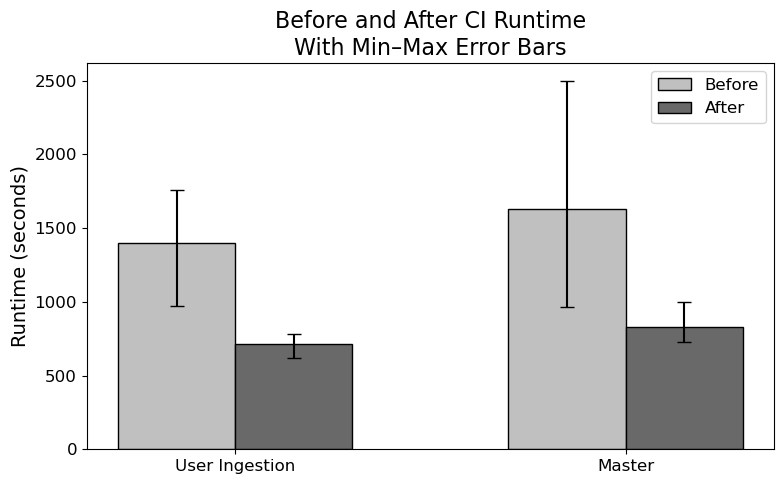

In [59]:
#!/usr/bin/env python3
import numpy as np
import matplotlib.pyplot as plt

def compute_stats(durations):
    """Return (mean, min, max) for the given list of durations."""
    arr = np.array(durations, dtype=float)
    return arr.mean(), arr.min(), arr.max()

# 2) Compute mean/min/max for each
bui_mean, bui_min, bui_max = compute_stats(before_user_ingestion)
aui_mean, aui_min, aui_max = compute_stats(after_user_ingestion)
bms_mean, bms_min, bms_max = compute_stats(before_master_scheduled)
ams_mean, ams_min, ams_max = compute_stats(after_master_scheduled)

# 3) Print out the stats (optional) 
print("==== Before - User Ingestion ====")
print(f"  Mean: {bui_mean:.2f}, Min: {bui_min}, Max: {bui_max}")
print("==== After - User Ingestion ====")
print(f"  Mean: {aui_mean:.2f}, Min: {aui_min}, Max: {aui_max}")
print("==== Before - Master Scheduled ====")
print(f"  Mean: {bms_mean:.2f}, Min: {bms_min}, Max: {bms_max}")
print("==== After - Master Scheduled ====")
print(f"  Mean: {ams_mean:.2f}, Min: {ams_min}, Max: {ams_max}")

# 4) Prepare data for plotting
# We'll have 2 main groups on the X-axis:
#   X=0 => "User Ingestion"
#   X=1 => "Master Scheduled"
#
# Each group gets 2 bars: "Before" and "After".
# We'll store the means and error bars for each "Before" or "After" in arrays.

x_positions = np.array([0, 1], dtype=float)  # 0 => user ingestion, 1 => master scheduled
bar_width = 0.3

# Means for "Before" in the same order (UserIng, MasterSched)
before_means = [bui_mean, bms_mean]
# Means for "After"
after_means  = [aui_mean, ams_mean]

# Compute error bar distances: (yerr = [[lower_errors], [upper_errors]])
# Lower error = mean - min; Upper error = max - mean
before_lower_err = [bui_mean - bui_min, bms_mean - bms_min]
before_upper_err = [bui_max - bui_mean, bms_max - bms_mean]
after_lower_err  = [aui_mean - aui_min, ams_mean - ams_min]
after_upper_err  = [aui_max - aui_mean, ams_max - ams_mean]

before_yerr = [before_lower_err, before_upper_err]
after_yerr  = [after_lower_err, after_upper_err]
# 5) Create the plot
fig, ax = plt.subplots(figsize=(8, 5))

# Plot "Before" bars (shift them left by half bar_width)
bars_before = ax.bar(
	x_positions - bar_width/2,
	before_means,
	yerr=before_yerr,
	width=bar_width,
	capsize=5,
	label="Before",
	color="silver",
	edgecolor="black",
)

# Plot "After" bars (shift them right by half bar_width)
bars_after = ax.bar(
	x_positions + bar_width/2,
	after_means,
	yerr=after_yerr,
	width=bar_width,
	capsize=5,
	label="After",
	color="dimgray",
	edgecolor="black",
)

# 6) Style the axes and labels
ax.set_xticks(x_positions)
ax.set_xticklabels(["User Ingestion", "Master"])
ax.set_ylabel("Runtime (seconds)")
ax.set_title("Before and After CI Runtime\nWith Min–Max Error Bars")
ax.legend()

# Optional: Annotate the numeric mean above each bar
def annotate_bars(rects):
	for rect in rects:
		height = rect.get_height()
		ax.annotate(f"{height:.0f}",
					xy=(rect.get_x() + rect.get_width()/2, height),
					xytext=(0, 3),
					textcoords="offset points",
					ha="center", va="bottom")

# annotate_bars(bars_before)
# annotate_bars(bars_after)

plt.tight_layout()
ax.set_facecolor("none")
fig.patch.set_alpha(0.0)  # Make the background transparent
plt.show()
plt.savefig("light-slurm-ci-graph.png")

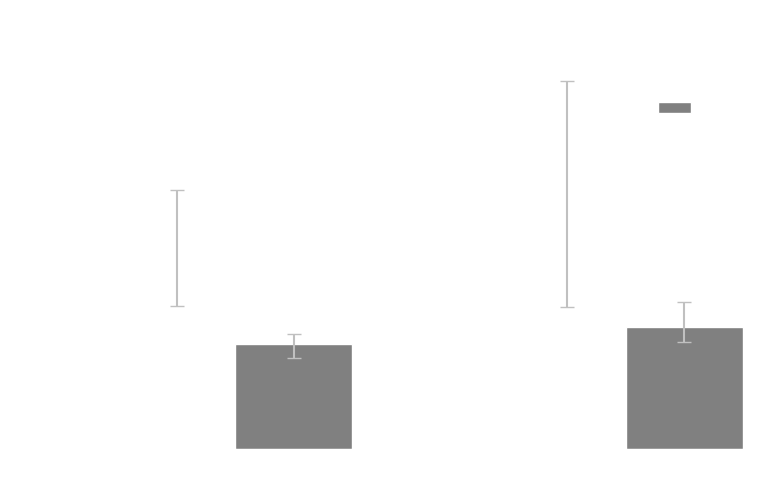

In [ ]:
# Create the plot with updated colors
fig, ax = plt.subplots(figsize=(8, 5), facecolor="none")

# Plot "Before" bars in white
bars_before = ax.bar(
	x_positions - bar_width/2,
	before_means,
	yerr=before_yerr,
	width=bar_width,
	capsize=5,
	label="Before",
	color="white",
	edgecolor="white",
	error_kw=dict(ecolor='silver')
)

# Plot "After" bars in gray
bars_after = ax.bar(
	x_positions + bar_width/2,
	after_means,
	yerr=after_yerr,
	width=bar_width,
	capsize=5,
	label="After",
	color="gray",
	edgecolor="white",
	error_kw=dict(ecolor='silver')
)

# Style the axes and labels
ax.set_xticks(x_positions)
ax.set_xticklabels(["User Ingestion", "Master"], color="white")
ax.set_ylabel("Runtime (seconds)", color="white")
ax.set_title("Before and After CI Runtime\nWith Min–Max Error Bars", color="white")
ax.legend(facecolor="none", edgecolor="white", labelcolor="white")

# Make the axis white
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_facecolor("none")

# Annotate bars
def annotate_bars(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f"{height:.0f}",
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha="center", va="bottom",
                    color="white")

# annotate_bars(bars_before)
# annotate_bars(bars_after)

plt.tight_layout()
plt.show()
plt.savefig("dark-slurm-ci-graph.png")